# Titanic tutorial_ver2
https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
# matplotlib 다른 스타일
#plt.style.use('ggplot')

In [24]:
data=pd.read_csv('./train.csv')

# Part1: Exploratory Data Analysis(EDA)


### Types of Features
* Categorical Features -> Sex, Embarked
* Ordinal Features -> PClass
* Continuous Feature -> Age


In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# 데이터 null값 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

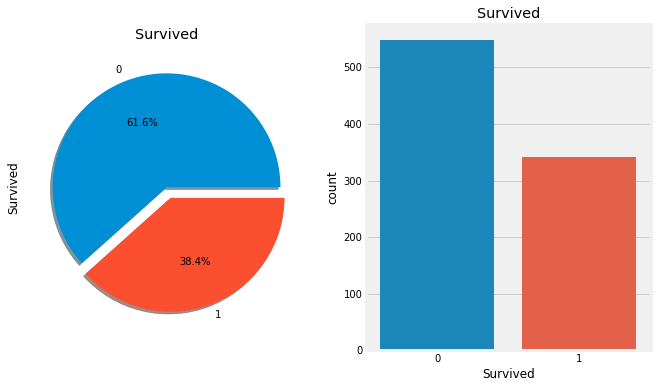

In [27]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Survived')
sns.countplot(data['Survived'], ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('count')
plt.show()

#### groupby(['A','B']) 
* A가 앞에오면 A를 기준으로 그룹핑, B가 앞에오면 B를 기준으로 그룹핑

In [28]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

#### groupby().mean() 
* 그룹핑 합계 대비 해당 값의 비율

In [29]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


* 남자의 생존률은 18-19%인데 비해 여자의 생존률은 약 75% 가까이 되는것을 확인.

-----------------------------------------------------------------------------------------------------------------------
### Sex ---> Categorical Feature

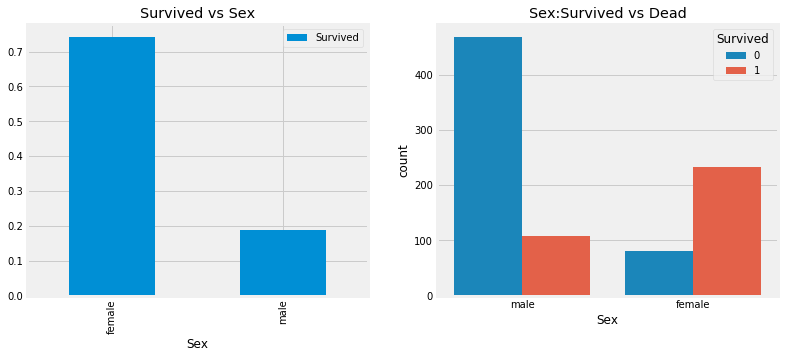

In [30]:
# Sex 별 생존률 그래프와 Sex 별 생존/사망 그래프
fig, ax = plt.subplots(1,2, figsize=(12,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data= data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

-----------------------------------------------------------------------------------------------------------------------
### Pclass ---> Ordinal Feature
* crosstab 활용

In [31]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


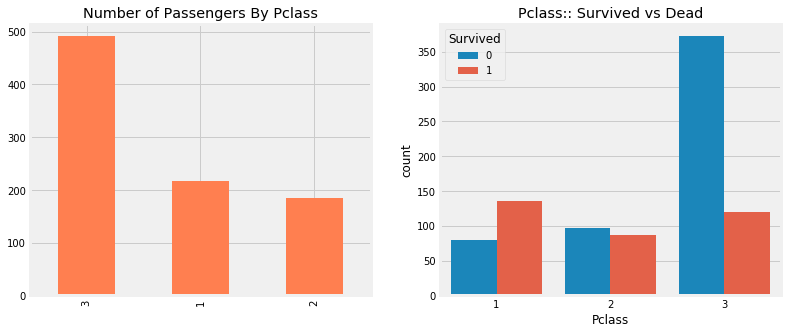

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
data['Pclass'].value_counts().plot.bar(color='coral', ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:: Survived vs Dead')
plt.show()

* PClass =1 인 경우에 생존자가 가장 많은 것을 확인할 수 있음.
* PClass=1 생존률은 약63%인데 비해, PClass=2는 47%, PClass=3은 24%에 불과하다.


#### Sex, Pclass 별 생존률 확인

In [33]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

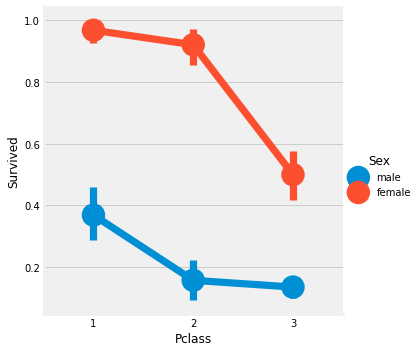

In [34]:
sns.factorplot('Pclass','Survived', hue='Sex', data=data)
plt.show()

* 이를 통해, Pclass1에 있던 여성들의 생존률은 95-96%인것을 알 수 있다. 
    * 94명 중 3명만 사망

-----------------------------------------------------------------------------------------------------------------------
### Age ---> Continous feature

In [35]:
print('Oldest Age:',data['Age'].max())
print('Youngest Age:',data['Age'].min())
print('Average Age:',data['Age'].mean())

Oldest Age: 80.0
Youngest Age: 0.42
Average Age: 29.69911764705882


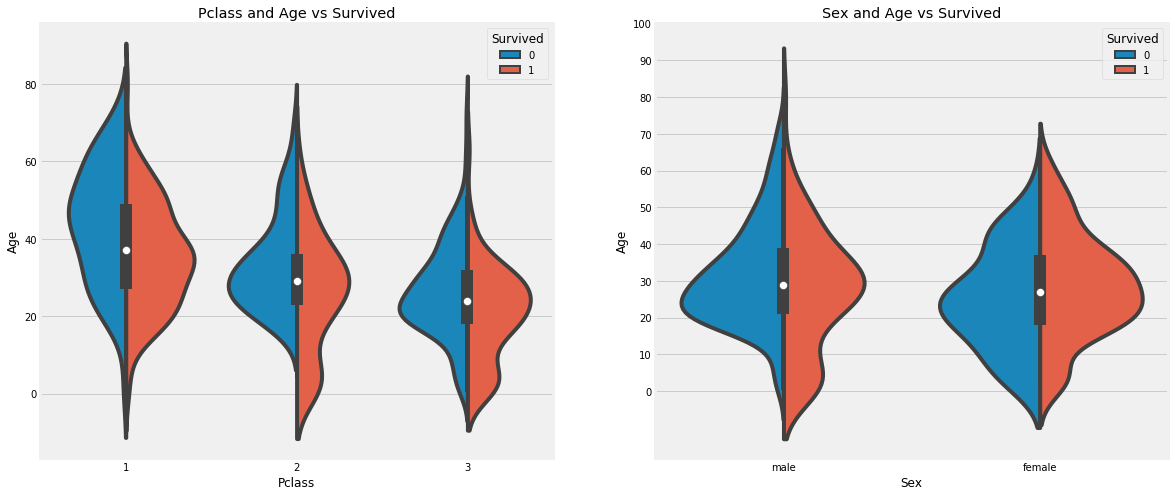

In [36]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived",data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))  # y축 범위설정 => set_yticks
plt.show()

* 아이들의 수는 Pclass가 클수록 많음
* 20-50세 승객의 생존률은 Pclass1에서 가장 높고, 여성이 더 많음.
* 남자는 나이가 들수록 생존률이 낮다.

#### Name 컬럼을 통해 Age 컬럼의 null값을 채울 수 있다.

In [37]:
data['Initial'] = 0
for i in data:
    data['Initial']= data.Name.str.extract('([A-Za-z]+)\.')

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [39]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [40]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [41]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### 위의 Initial별 평균 나이로 null값을 채운다.

In [42]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [43]:
# null값 없는것을 확인
data.Age.isnull().any()

False

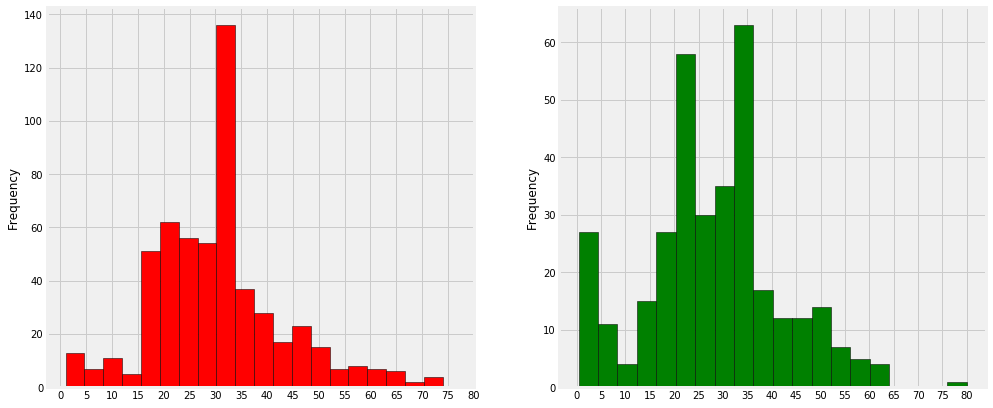

In [44]:
# 나이에 대한 히스토그램
fig, ax = plt.subplots(1,2, figsize=(15,7))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='black', color='red')
ax[0].set_xticks(list(range(0, 85, 5)))  # x축 값 범위
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_xticks(list(range(0,85,5)))
plt.show()

* 5살 미만 아기들은 많이 생존한 것을 확인.
* 최고령자 80세 생존한 것을 확인.
* 30-40세가 사망자가 가장 많음.

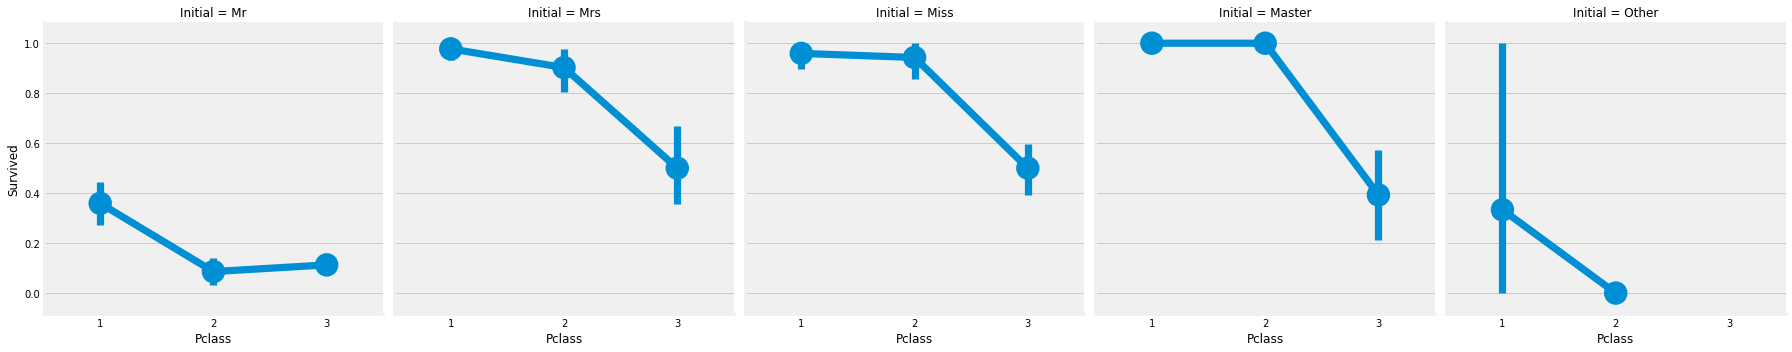

In [45]:
sns.factorplot('Pclass','Survived', col='Initial',data=data)
plt.show()

-----------------------------------------------------------------------------------------------------------------------
### Embarked ---> Categorical Value

In [46]:
pd.crosstab([data.Embarked,data.Pclass], [data.Sex,data.Survived], margins=True).style.background_gradient(cmap='summer_r')

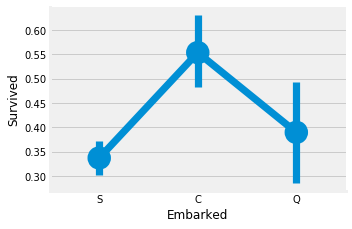

In [47]:
sns.factorplot('Embarked','Survived', data=data)
fig=plt.gcf()  # figure 객체를 얻으려면 gcf 명령어 사용
fig.set_size_inches(5,3)  # 그래프 크기변경
plt.show()

* C에서의 생존률이 약 0.55로 가장 높고, S에서의 생존률이 가장 낮다.

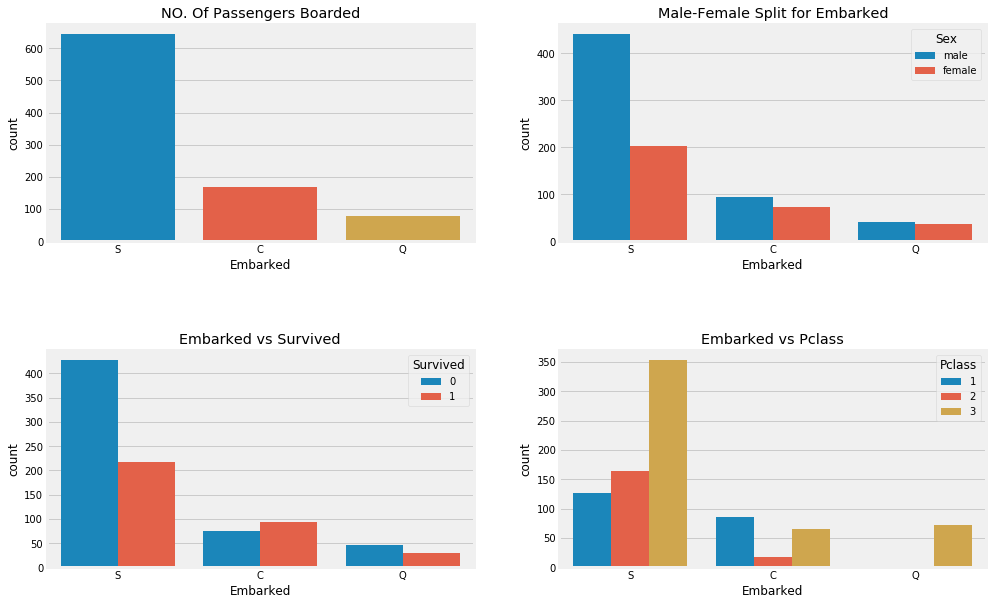

In [48]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('NO. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)   # 그래프간 간격 조정
plt.show()

* S에서 승객이 가장 많이 탑승했고, 그들중 대부분은 Pclass=3임.
* C에서 탑승한 승객들의 생존률이 가장 높은데, 그 이유로는 C 탑승 승객들중 Pclass=1 이 상당수임.
* S에서 Pclass=1 탑승객이 많은 것으로 보아 부유한 사람들이 많은 것 같은데, 생존률은 낮은 이유는 Pclass=3 인 탑승객이 상당히 많기 때문에 이들이 대부분 사망했기 때문
* Q의 승객들은 거의 다 Pclass=3임.

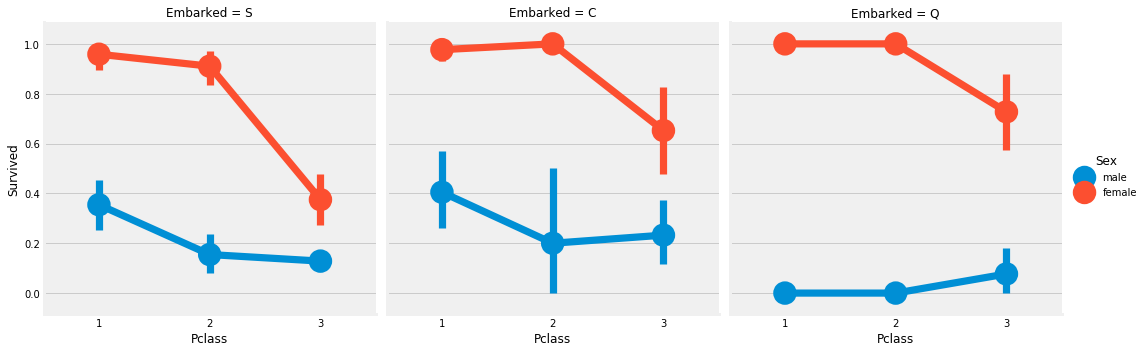

In [49]:
sns.factorplot('Pclass','Survived', col='Embarked',hue='Sex',data=data)
plt.show()

* Pclass=1과 Pclass=2 에서는 여성들의 생존률이 거의 1에 가까움
* S항구에서 Pclass=3인 탑승객은 남,여 모두 생존률이 낮음.
* Q항구에서 남자는 대부분 다 생존률이 낮음.

#### S항구에서 탑승객이 가장 많으므로, Embarked에 null값은 'S'로 채운다.

In [50]:
data['Embarked'].fillna('S', inplace=True)

In [51]:
data.Embarked.isnull().any()

False

-----------------------------
### SibSip ---> Discrete Feature

In [52]:
pd.crosstab([data.SibSp], data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


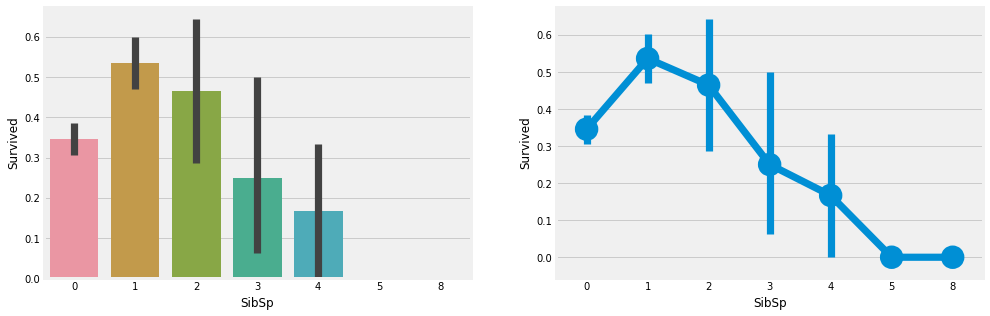

In [53]:
f, ax= plt.subplots(1,2, figsize=(15,5))
sns.barplot('SibSp','Survived', data=data, ax=ax[0])
sns.factorplot('SibSp','Survived', data=data, ax=ax[1])
plt.close(2)
plt.show()

In [54]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


* sibling이 없고, 혼자인 탑승객은 34.5%의 생존률로 살아남았고
* 가족수가 늘어날수록 생존률은 줄어든다.
    * Sibsp 수가 3보다 큰 경우는 전부 Pclass3이다.

### Parch

In [55]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


* 보이는것 처럼, 가족이 많을수록 Pclass3이다.

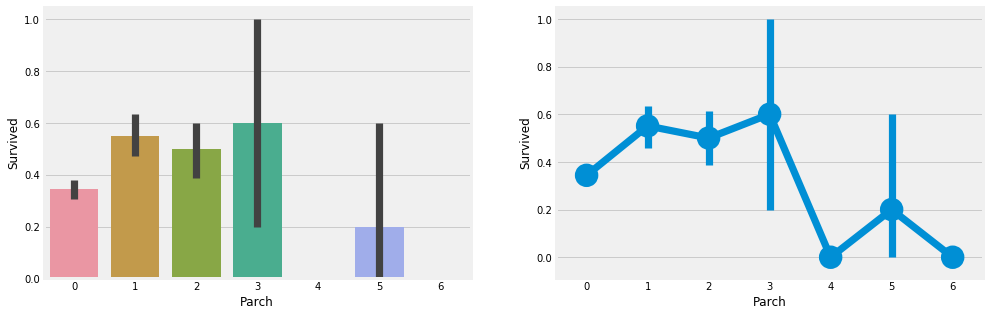

In [56]:
f, ax= plt.subplots(1,2, figsize=(15,5))
sns.barplot('Parch','Survived', data=data, ax=ax[0])
sns.factorplot('Parch','Survived', data=data, ax=ax[1])
plt.close(2)
plt.show()

* 가족이 3명인 경우 생존률이 가장 높고, 너무 적거나 많아도 생존률이 떨어짐.

----------------------------------
### Fare ---> Continuous Feature

In [57]:
print('Highest Fare:',data['Fare'].max())
print('Lowest Fare:',data['Fare'].min())
print('Average Fare:',data['Fare'].mean())

Highest Fare: 512.3292
Lowest Fare: 0.0
Average Fare: 32.2042079685746


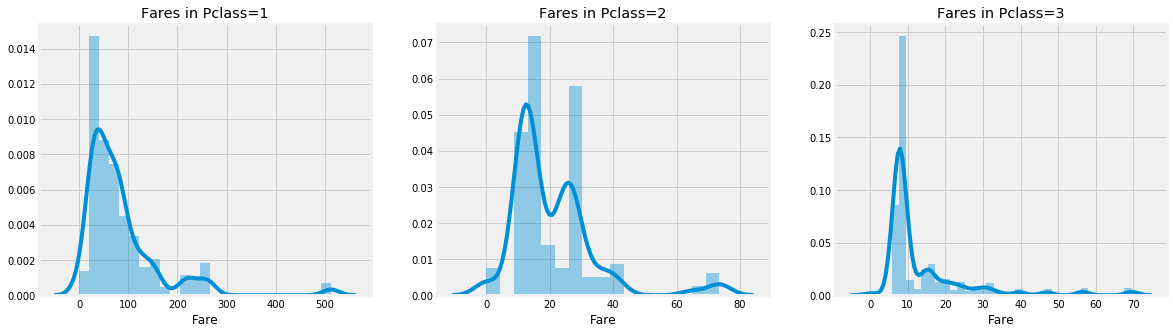

In [58]:
# Pclass=1,2,3 일때 각각의 Fare plot
fig, ax = plt.subplots(1,3, figsize=(18,5))
sns.distplot(data[data.Pclass==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass=1')
sns.distplot(data[data.Pclass==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass=2')
sns.distplot(data[data.Pclass==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass=3')
plt.show()

* Pclass1에서의 Fares분포가 지나치게 치우쳐 있음. 

#### Feature 들 간의 상관관계

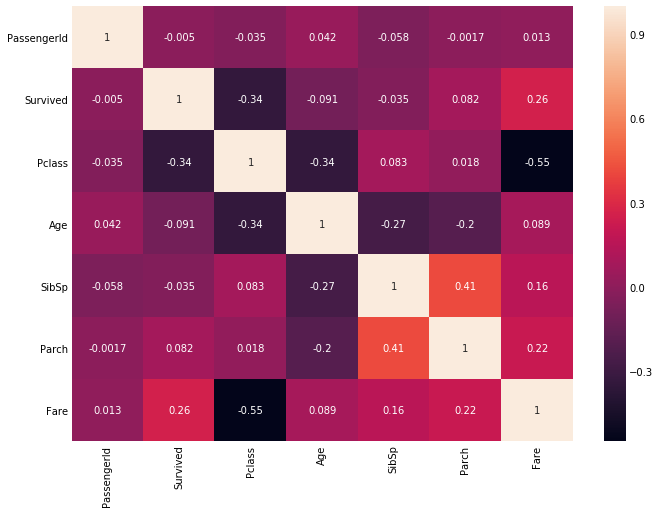

In [59]:
sns.heatmap(data.corr(), annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* 지나치게 상관관계가 높은 feature들은 둘중 하나는 제거하는게 좋을 수 있다.
* 위 히트맵에서는 SibSp 와 Parch 가 0.41로 가장 높은 상관관계를 보인다. 

----------------------------------------------------------------------------------------------
# Part2: Feature Engineering and Data Cleaning

### Age grouping
* 0-80 까지의 나이를 5개로 그룹핑

In [60]:
data['Age_band'] =0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [61]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


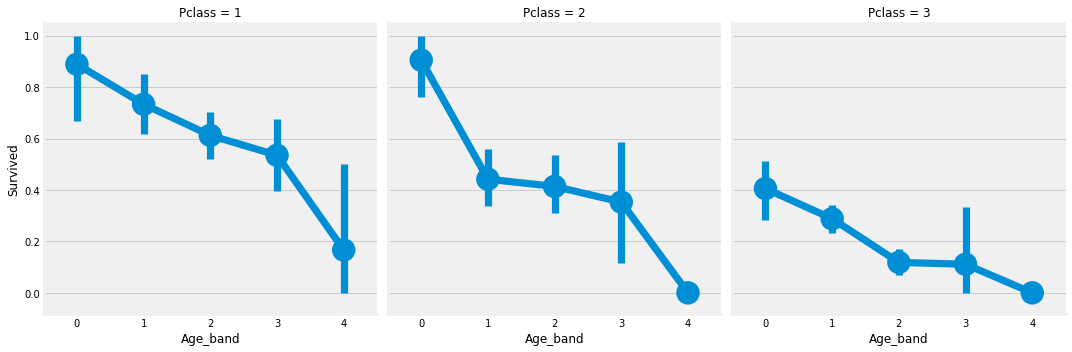

In [62]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

* 나이가 많을수록 생존률이 떨어지는 것을 확인할 수 있고, Pclass=1의 경우 생존률 높게 유지

### Family_Size and Alone


In [63]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']

In [64]:
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1   # 가족없이 혼자이면 1, 아니면 0

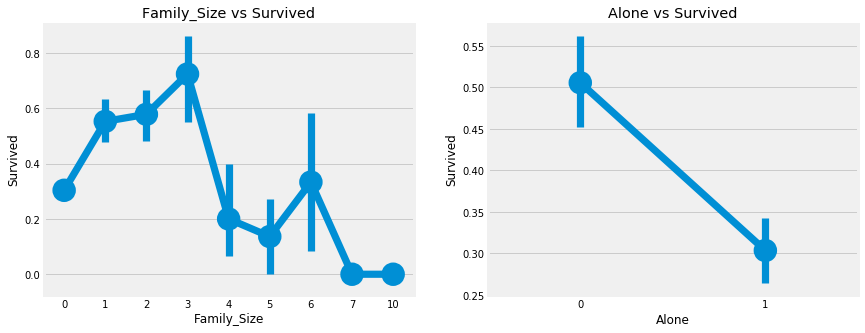

In [65]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.factorplot('Family_Size','Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

* 혼자 탑승한 승객은 생존률이 굉장히 낮은 것을 확인. 
* 또한 family size가 4보다 큰 경우도 생존률이 감소하는 것을 확인.

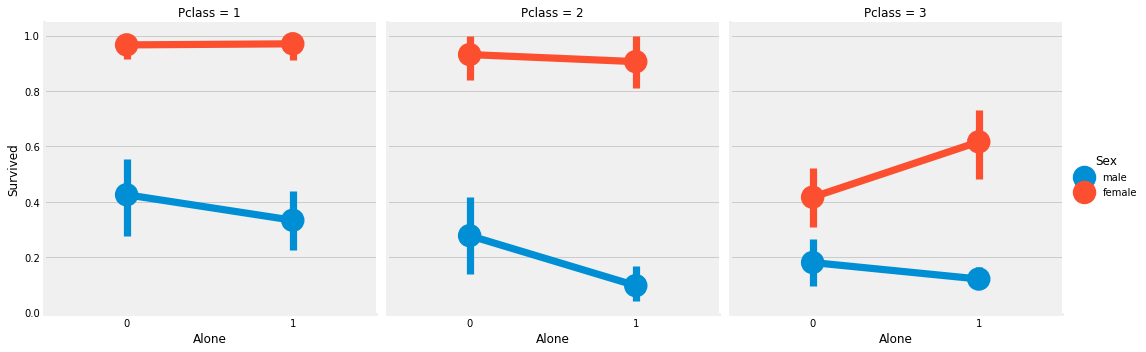

In [66]:
sns.factorplot('Alone','Survived', data=data, hue='Sex', col='Pclass')
plt.show()

### Fare_Range
* 요금을 네 구간으로 나누기 위해 qcut 사용

In [67]:
data['Fare_Range']=pd.qcut(data['Fare'],4)

In [68]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


* 요금이 비쌀수록 생존률도 높은것을 확인.

요금도 나이와 마찬가지로 4개로 그룹핑

In [69]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cat']=3


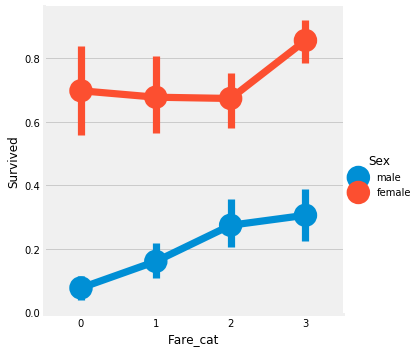

In [70]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

* Fare_cat 이 오를수록 생존률도 같이 높아지는 것을 볼 수 있다.

### Converting String Values into Numeric

Sex, Embarked, Initial 은 string 데이터 이므로 numeric 형태로 바꿔야 함.

In [71]:
data['Sex'].replace(['male','female'],[0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

#### 필요없는 컬럼 삭제
* Name, Age, Ticket, Fare, Cabin, Fare_Range, PassengerId

In [72]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

In [73]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


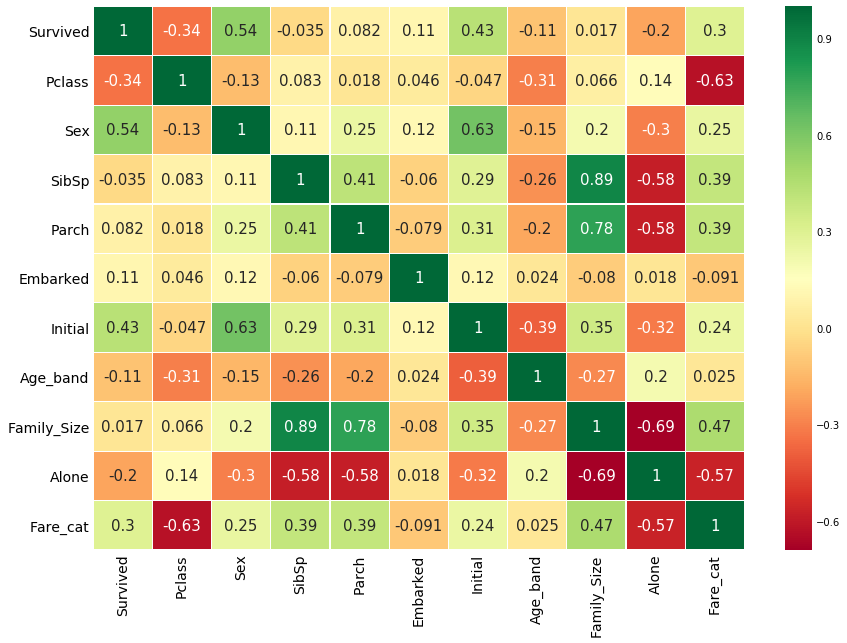

In [74]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':15})  # annot는 히트맵 안에 숫자표기
fig=plt.gcf()
fig.set_size_inches(13,10)
plt.xticks(fontsize=14) # x축 글자 크기
plt.yticks(fontsize=14) # y축 글자 크기
plt.show()

* SibSp 와 Family_Size, 그리고 Parch 와 Family_Size 간에는 양의 상관관계가 높은 것을 확인. 
* Alone 과 Family_Size 간에는 음의 상관관계가 높음.

----------------------------------------------------------------------------------------------
# Part3: Predictive Modeling
1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree


In [75]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [86]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]   # Survived 컬럼 외 나머지 컬럼전체
train_Y = train[train.columns[:1]]   # Survived컬럼만
test_X = test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]  # 아래 Cross Validation을 위함.
Y=data['Survived']

#### Radial Support Vector Machines(rbf-SVM)

In [87]:
model=svm.SVC(kernel='rbf', C=1, gamma=0.1)  # C 는 슬랙변수 가중치 
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [89]:
model=svm.SVC(kernel='linear' ,C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [90]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


#### Decision Tree

In [91]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 =model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#### K-Nearest Negihbours(KNN)

In [94]:
model=KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 =model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806


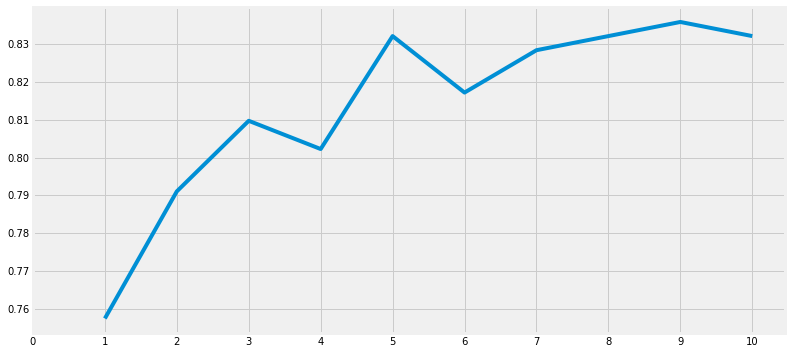

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [110]:
a_index=list(range(1,11))
a = pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values,'with the max value as', a.values.max())

#### Gaussian Naive Bayes

In [119]:
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forest

In [121]:
model=RandomForestClassifier(n_estimators=100)  # n_esstimators는 나무의 개수
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8134328358208955


## Cross Validation
* 정확도가 90%가 나왔다고해서 항상 그 모델이 정확도가 90%일수는 없다. 이는 데이터에 따라 달라질 수 있음. 따라서 이를 극복하고 일반화된 모델을 만들기 위해 Cross Validation 사용

In [122]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [128]:
kfold= KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression', 'KNN', 'Decisino Tree', 'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), 
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(), GaussianNB(),
        RandomForestClassifier(n_estimators=100)]

In [133]:
for i in models :
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    cv_result= cv_result
    xyz.append(cv_result.mean())   # kfold한 결과의 평균
    std.append(cv_result.std())  # kfold한 결과의 표준편차
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame( {'CV Mean':xyz, 'Std': std}, index=classifiers)
new_models_dataframe2 

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decisino Tree,0.808102,0.027554
Naive Bayes,0.801386,0.028999
Random Forest,0.815968,0.031248


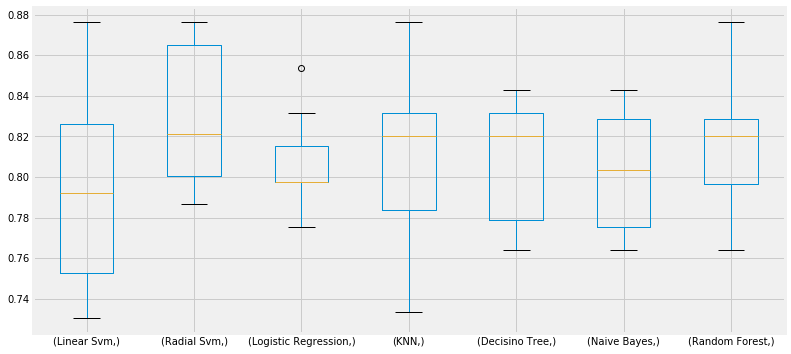

In [142]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()   # T는 행,열 을 바꾸기 위함. 컬럼별 데이터로.
plt.show()

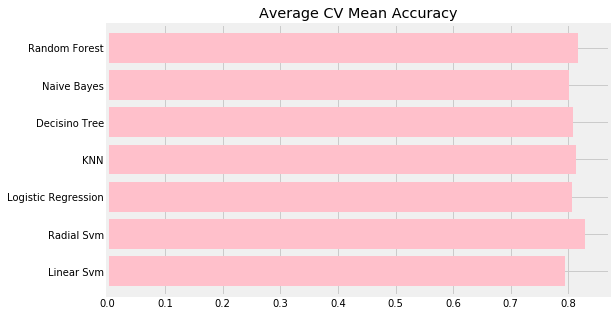

In [150]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8,  colors='pink')   # barh 로하면 가로막대로 그려짐. bar는 기본 세로막대
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

* 위 그래프를 통해 Radial Svm 의 CV Mean이 가장 높은 것을 쉽게 확인가능.

## Confusion Matrix
* Confusion Matrix를 통해 모델의 어떤 부분이 잘못되었는지, 모델이 어떤 클래스를 잘못예측했는지를 요약된 결과로 볼 수 있다.

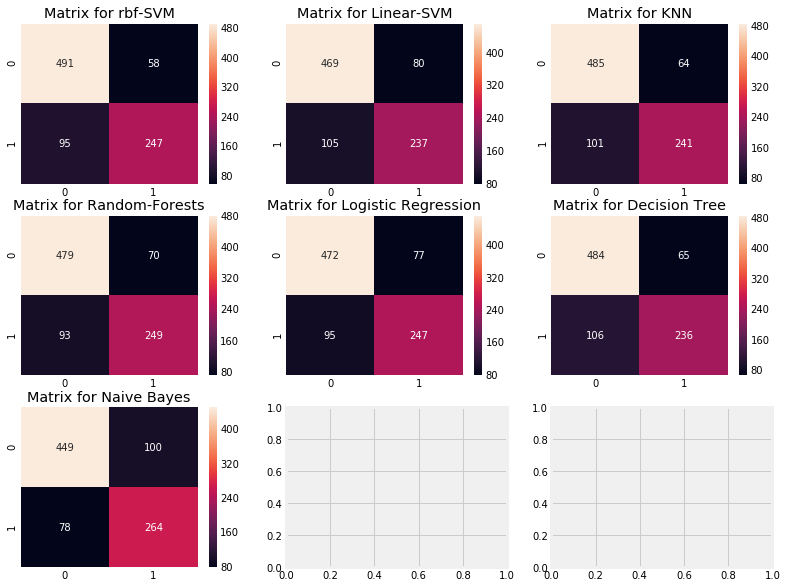

In [157]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

* 모든 매트릭스를 봤을 때, rbf-SVM은 사망자를 잘 예측했고, <br>
NaiveBayes는 생존자를 잘 예측한것을 알 수 있다.

----------------------------------------------------
## Hyper-Parameters Tuning

#### SVM

In [158]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf', 'linear']
hyper={'kernel': kernel, 'C': C, 'gamma': gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    9.9s finished


#### Random Forest

In [161]:
n_estimators= range(100, 1000, 100) # 100부터 1000까지 100단위로
hyper={'n_estimators': n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   11.9s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


* Rbf-Svm 의 best score는 C=0.5, gamma=0.1일때 82.92% , 
* RandomForest의 best score는 n_estimators=900 일때 81.8% 

-----------------------
## Ensembling
모형 결합 방법은 크게 나누어 취합(aggregation) 방법론과 부스팅 (boosting) 방법론으로 나눌 수 있다.
* 취합 방법론은 사용할 모형의 집합이 이미 결정되어 있지만
* 부스팅 방법론은 사용할 모형을 점진적으로 늘려간다.

#### 취합 방법론
* 다수결 (Majority Voting)
* 배깅 
* 랜덤포레스트

#### 부스팅 방법론
* 에이다부스트 (AdaBoost)
* 그레디언트 부스트 (Gradient Boost)

**배깅** 은 여러개의 분류기를 만들어서 최종적으로 voting을 해서 결정하는 알고리즘이다. <br>
대표적인 bagging 방식으로는 랜덤포레스트가 있다. <br>
**voting**과 **bagging**의 차이점은 voting은 일반적으로 서로 다른 알고리즘을 결합한 분류기를 만들어준다. <br>

**bagging**은 분류기가 모두 같은 알고리즘이지만, 데이터 샘플링을 다르게 가져가며 학습을 수행하는 방식이다. 이 방식을 bootstrapping이라고도 함. <br>
* bagging에서는 같은 데이터 셋을 사용하지만 샘플링된 데이터 셋이 서로 다르다. (데이터는 중복될 수 있음)
* voting에서는 서로 다른 데이터 셋이 아니라, 같은 데이터 셋을 사용한다.

즉, **bagging**은 샘플링된 데이터는 중복된 값이 들어갈 수 있고 그 데이터를 가지고 같은 모델을 사용해서 최종 예측을 한다. <br>
**voting**은 같은 데이터 셋을 사용해서 서로 다른 알고리즘을 사용해 예측하고 이들을 결합한 것.

**부스팅(boostin)** 은 여러 개의 분류기가 순차적으로 학습을 하는데, 앞에서 예측한 분류기가 예측을 틀린 부분에 있어 **가중치**를 부여한다는 것이 큰 특징이다.


### Voting Classifier

In [162]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237660310974917


### Bagging

#### Bagged KNN

In [163]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


#### Bagged Decision Tree

In [164]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


### Boosting
* AdaBoost
* Stochastic Gradient Boosting
* XGBoost
* Hyper-Parameter Tuning for AdaBoost


#### AdaBoost

#### Stochastic Gradient Boosting

#### XGBoost

#### Hyper-Parameter Tuning for AdaBoost

## Feature Importance